Batch calculation of archaic introgression in papio and anubis

In [1]:
%run ../scripts/notebook_settings.py

In [2]:
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']

Archaic blocks in papio

In [3]:
ingroup_ids = meta_data_samples.loc[meta_data_samples.Species == "papio"].callset_index.values
ingroup_names = meta_data_samples.loc[meta_data_samples.Species == "papio"].PGDP_ID.values
outgroup_ids = meta_data_samples.loc[(meta_data_samples.Species != "papio") &
                                     (meta_data_samples.Species != "gelada")].callset_index.values
dir_name = "steps/papio_intro/"

In [4]:
path = "../"+dir_name+"{}.Summary.txt"
archaic_lengths = 0
normal_lengths = 0
id_list = []
percentage_list = []
for ID in ingroup_names:
    summary_file = pd.read_csv(path.format(ID), sep = "\t")
    archaic_lengths += summary_file.loc[summary_file.state == "Archaic"].length.sum()
    normal_lengths += summary_file.loc[summary_file.state == "Baboon"].length.sum()
    id_list.append(ID)
    percentage_list.append(summary_file.loc[summary_file.state == "Archaic"].length.sum()/summary_file.length.sum())
    print(ID)

PD_0390
PD_0391
PD_0392
PD_0393
PD_0394
PD_0395
PD_0396
PD_0397
PD_0398
PD_0399
PD_0400
PD_0401


In [5]:
archaic_lengths/(normal_lengths+archaic_lengths)

0.056258996975579366

In [6]:
d = {"PGDP_ID": id_list, "Archaic_percentage": percentage_list}
df_papio = pd.DataFrame(data=d)

<AxesSubplot:xlabel='Archaic_percentage', ylabel='Count'>

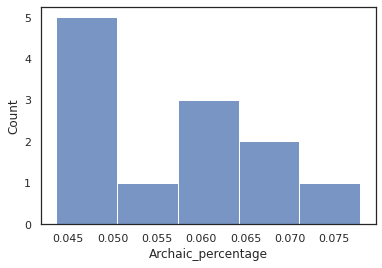

In [7]:
sns.histplot(df_papio, x="Archaic_percentage")

In [8]:
df_papio.groupby("PGDP_ID").mean()

,Archaic_percentage
PGDP_ID,
PD_0390,0.065964
PD_0391,0.077934
PD_0392,0.063047
PD_0393,0.065233
PD_0394,0.061221
PD_0395,0.047973
PD_0396,0.048643
PD_0397,0.057403
PD_0398,0.049032


Block stats

In [9]:
path = "../"+dir_name+"{}.All_posterior_probs.txt"
df_start = None
total_df = pd.DataFrame()
df_list = []
for ID in ingroup_names:
    total_file = pd.read_csv(path.format(ID), sep = "\t")
    if df_start == None:
        total_df = total_file
        df_start = True
    total_df[ID] = total_file["Mostlikely"]
    print(ID)

PD_0390
PD_0391
PD_0392
PD_0393
PD_0394
PD_0395
PD_0396
PD_0397
PD_0398
PD_0399
PD_0400
PD_0401


<AxesSubplot:ylabel='Count'>

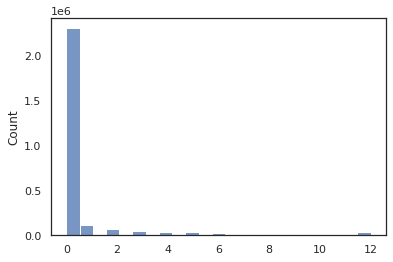

In [10]:
sns.histplot((total_df.iloc[:,7:] == "Archaic").sum(axis=1))

In [11]:
chrom_blocks = (total_df.iloc[:,7:] == "Archaic").sum(axis=1)

Text(0.5, 1.0, 'Number of archaic blocks per window, removing 0')

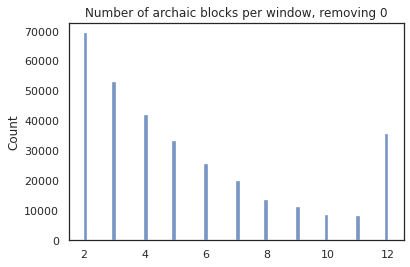

In [12]:
sns.histplot(chrom_blocks.loc[(chrom_blocks > 1)]).set_title("Number of archaic blocks per window, removing 0")

Generalized descriptions of the block stats, set up to run on each combination

In [13]:
name_l_l = [meta_data_samples.loc[meta_data_samples.Species == "papio"].PGDP_ID.values,
           meta_data_samples.loc[meta_data_samples.Species == "anubis"].PGDP_ID.values,
           meta_data_samples.loc[meta_data_samples.Origin == "Udzungwa, Tanzania"].PGDP_ID.values]
dir_l = ["steps/papio_intro/", "steps/anubis_intro/", "steps/subcynocephalus_intro/"]

In [14]:
def percentage_check(ingroup_ids, dir_name):
    path = "../"+dir_name+"{}.Summary.txt"
    archaic_lengths = 0
    normal_lengths = 0
    id_list = []
    percentage_list = []
    for ID in ingroup_ids:
        summary_file = pd.read_csv(path.format(ID), sep = "\t")
        archaic_lengths += summary_file.loc[summary_file.state == "Archaic"].length.sum()
        normal_lengths += summary_file.loc[summary_file.state == "Baboon"].length.sum()
        id_list.append(ID)
        percentage_list.append(summary_file.loc[summary_file.state == "Archaic"].length.sum()/summary_file.length.sum())
    return pd.DataFrame(data={"ID": id_list, "percentage_archaic": percentage_list})

In [15]:
percentage_check(meta_data_samples.loc[meta_data_samples.Origin == "Udzungwa, Tanzania"].PGDP_ID.values, "steps/subcynocephalus_intro/")

,ID,percentage_archaic
0,PD_0223,0.136263
1,PD_0224,0.112581
2,PD_0225,0.141226
3,PD_0226,0.126508
4,PD_0227,0.123819


In [16]:
def block_overlap(ingroup_ids, dir_name):
    path = "../"+dir_name+"{}.All_posterior_probs.txt"
    df_start = None
    total_df = pd.DataFrame()
    df_list = []
    for ID in ingroup_ids:
        total_file = pd.read_csv(path.format(ID), sep = "\t")
        if df_start == None:
            total_df = total_file
            df_start = True
        total_df[ID] = total_file["Mostlikely"]
    return total_df

In [17]:
block_df = block_overlap(meta_data_samples.loc[meta_data_samples.Species == "anubis"].PGDP_ID.values, "steps/anubis_intro/")

<AxesSubplot:ylabel='Count'>

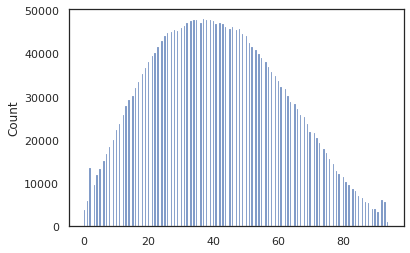

In [18]:
sns.histplot((block_df.iloc[:,7:] == "Archaic").sum(axis=1))

In [19]:
chrom_blocks = (block_df.iloc[:,7:] == "Archaic").sum(axis=1)

Text(0.5, 1.0, 'Number of archaic blocks per window, removing 0')

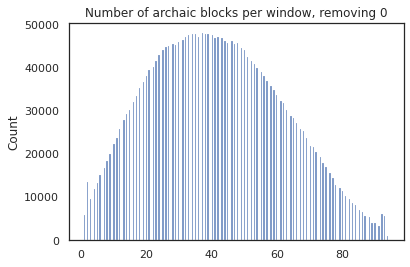

In [20]:
sns.histplot(chrom_blocks.loc[(chrom_blocks >= 1)]).set_title("Number of archaic blocks per window, removing 0")

In [21]:
def block_lengths(ingroup_ids, dir_name):
    path = "../"+dir_name+"{}.Summary.txt"
    df_list = []
    for ID in ingroup_ids:
        summary_file = pd.read_csv(path.format(ID), sep = "\t")
        df = pd.DataFrame()
        archaic_df = summary_file.loc[summary_file.state == "Archaic"]
        df["a_length"] = archaic_df.length.values
        df["ID"] = ID
        df["chrom"] = archaic_df.chrom.values
        df_list.append(df)
    return pd.concat(df_list)

Checking all combinations

In [22]:
df_list = []
for i in range(len(dir_l)):
    df_list.append(percentage_check(name_l_l[i], dir_l[i]))

Text(0.5, 1.0, 'Papio')

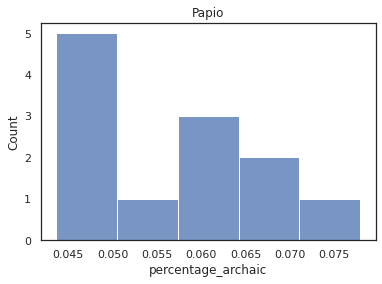

In [23]:
df = df_list[0]
sns.histplot(df, x="percentage_archaic").set_title("Papio")

Text(0.5, 1.0, 'Anubis')

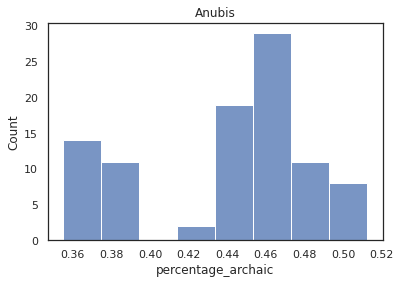

In [24]:
df = df_list[1]
sns.histplot(df, x="percentage_archaic").set_title("Anubis")

In [25]:
df.loc[df.percentage_archaic < 0.4] #Ethiopian anubis

,ID,percentage_archaic
69,PD_0720,0.375317
70,PD_0721,0.368704
71,PD_0722,0.369746
72,PD_0723,0.366946
73,PD_0724,0.364043
74,PD_0725,0.377834
75,PD_0726,0.361336
76,PD_0727,0.378253
77,PD_0728,0.367571
78,PD_0729,0.377566


Text(0.5, 1.0, 'Subcynocephalus')

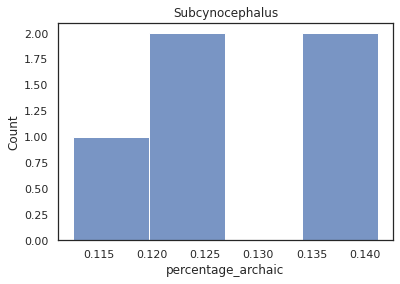

In [26]:
df = df_list[2]
sns.histplot(df, x="percentage_archaic").set_title("Subcynocephalus")

In [27]:
df_list = []
for i in range(len(dir_l)):
    df_list.append(block_lengths(name_l_l[i], dir_l[i]))

Text(0.5, 1.0, 'Papio')

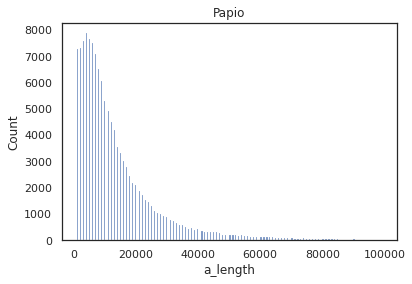

In [28]:
df = df_list[0]
sns.histplot(df.loc[df.a_length < 100000], x="a_length").set_title("Papio")

Text(0.5, 1.0, 'Anubis')

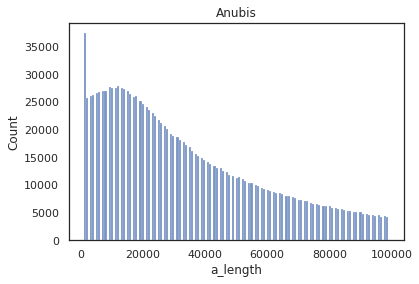

In [29]:
df = df_list[1]
sns.histplot(df.loc[df.a_length < 100000], x="a_length").set_title("Anubis")

Text(0.5, 1.0, 'Subcynocephalus')

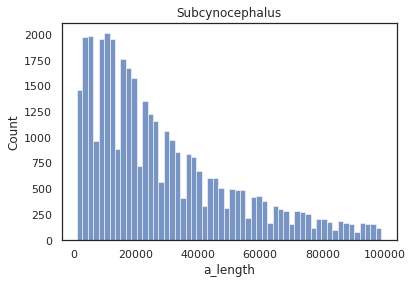

In [30]:
df = df_list[2]
sns.histplot(df.loc[df.a_length < 100000], x="a_length").set_title("Subcynocephalus")

In [44]:
def hmm_models(ingroup_ids, dir_name):
    path = "../"+dir_name+"{}.hmm"
    t1, t2, t3, t4, e1, e2, ID_l, chrom_l = [], [], [], [], [], [], [], []
    for ID in ingroup_ids:
        with open(path.format(ID)) as f:
            lines = f.readlines()
        hmm_t = []
        for l in lines[7].strip()[14:].split(","):
            hmm_t.append(l.strip("]["))
        t1.append(hmm_t[0]), t2.append(hmm_t[1]), t3.append(hmm_t[2]), t4.append(hmm_t[3])
        hmm_e = (lines[10].strip()[12:].strip("[]").split(","))
        e1.append(hmm_e[0]), e2.append(hmm_e[1])
        ID_l.append(ID)
        
    d = {"t1": t1, "t2": t2,"t3": t3,"t4": t4,"e1": e1,"e2": e2}
    hmm_df = pd.DataFrame(data=d)
    hmm_df = hmm_df.astype("float")
    hmm_df["ID"] = ID_l
    return hmm_df

In [45]:
df_list = []
for i in range(len(dir_l)):
    df_list.append(hmm_models(name_l_l[i], dir_l[i]))

Text(0.5, 1.0, 'Papio')

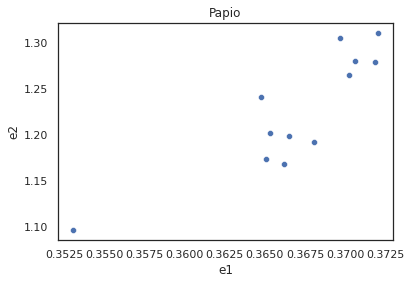

In [53]:
hmm_df = df_list[0]
sns.scatterplot(data=hmm_df, x="e1", y="e2").set_title("Papio")

Text(0.5, 1.0, 'Anubis')

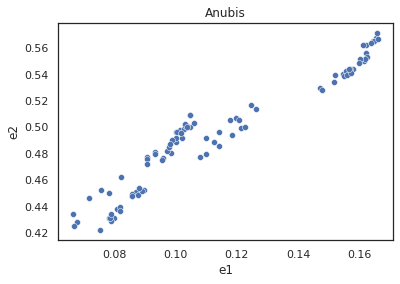

In [54]:
hmm_df = df_list[1]
sns.scatterplot(data=hmm_df, x="e1", y="e2").set_title("Anubis")

Text(0.5, 1.0, 'Subcynocephalus')

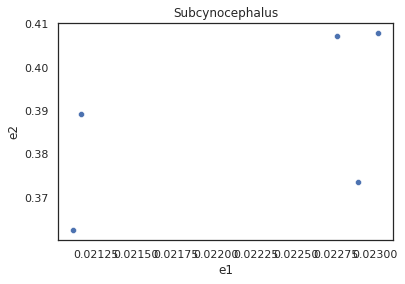

In [55]:
hmm_df = df_list[2]
sns.scatterplot(data=hmm_df, x="e1", y="e2").set_title("Subcynocephalus")

Archaic blocks in anubis

In [32]:
ingroup_ids = meta_data_samples.loc[meta_data_samples.Species == "anubis"].callset_index.values
ingroup_names = meta_data_samples.loc[meta_data_samples.Species == "anubis"].PGDP_ID.values
outgroup_ids = meta_data_samples.loc[(meta_data_samples.Species != "anubis") &
                                     (meta_data_samples.Species != "gelada")].callset_index.values
dir_name = "anubis_intro/"

In [33]:
path = "../"+dir_name+"chr{}/{}_chr{}_decoded.Summary.txt"
archaic_lengths = 0
normal_lengths = 0
id_list = []
percentage_list = []
chrom_list = []
for chrom in chromosome_numbers:
    for ID in ingroup_names:
        summary_file = pd.read_csv(path.format(chrom, ID, chrom), sep = "\t")
        archaic_lengths += summary_file.loc[summary_file.state == "Archaic"].length.sum()
        normal_lengths += summary_file.loc[summary_file.state == "Baboon"].length.sum()
        id_list.append(ID)
        percentage_list.append(summary_file.loc[summary_file.state == "Archaic"].length.sum()/summary_file.length.sum())
        chrom_list.append(chrom)
    print(chrom)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
X


In [34]:
archaic_lengths/(normal_lengths+archaic_lengths)

0.444183827920641

#This and later code is outdated, and is currently kept for the sake posteriority
Block stats, anubis

In [35]:
path = "../"+dir_name+"chr{}/{}_chr{}_decoded.All_posterior_probs.txt"
df_start = None
total_df = pd.DataFrame()
df_list = []
for chrom in chromosome_numbers:
    for ID in ingroup_names:
        total_file = pd.read_csv(path.format(chrom, ID, chrom), sep = "\t")
        if df_start == None:
            total_df = total_file
            df_start = True
        total_df[ID] = total_file["Mostlikely"]
    df_list.append(total_df)
    df_start = None
    print(chrom)
all_chromosomes = pd.concat(df_list)

1
2


KeyboardInterrupt: 

In [ ]:
sns.histplot((total_df.iloc[:,7:] == "Archaic").sum(axis=1))

Hmm model investigation

In [ ]:
ingroup_ids = meta_data_samples.loc[meta_data_samples.Species == "papio"].callset_index.values
ingroup_names = meta_data_samples.loc[meta_data_samples.Species == "papio"].PGDP_ID.values
outgroup_ids = meta_data_samples.loc[(meta_data_samples.Species != "papio") &
                                     (meta_data_samples.Species != "gelada")].callset_index.values
dir_name = "papio_intro/"

In [ ]:
path = "../"+dir_name+"chr{}/{}.chr{}_trained.hmm"
t1, t2, t3, t4, e1, e2, ID_l, chrom_l = [], [], [], [], [], [], [], []
for ID in ingroup_names:
    for chromosome in chromosome_numbers:
        with open(path.format(chromosome, ID, chromosome)) as f:
            lines = f.readlines()
        hmm_t = []
        for l in lines[7].strip()[14:].split(","):
            hmm_t.append(l.strip("]["))
        t1.append(hmm_t[0]), t2.append(hmm_t[1]), t3.append(hmm_t[2]), t4.append(hmm_t[3])
        hmm_e = (lines[10].strip()[12:].strip("[]").split(","))
        e1.append(hmm_e[0]), e2.append(hmm_e[1])
        ID_l.append(ID)
        chrom_l.append(chromosome)
        
d = {"t1": t1, "t2": t2,"t3": t3,"t4": t4,"e1": e1,"e2": e2}
hmm_df = pd.DataFrame(data=d)
hmm_df = hmm_df.astype("float")
hmm_df["ID"] = ID_l
hmm_df["chrom"] = chrom_l

In [ ]:
sns.histplot(data=hmm_df, x=hmm_df.e2/hmm_df.e1)

In [ ]:
sns.scatterplot(data=hmm_df, x="e1", y="e2")

In [ ]:
sns.scatterplot(data=hmm_df, x="t4", y="e2")

In [ ]:
ingroup_ids = meta_data_samples.loc[meta_data_samples.Species == "anubis"].callset_index.values
ingroup_names = meta_data_samples.loc[meta_data_samples.Species == "anubis"].PGDP_ID.values
outgroup_ids = meta_data_samples.loc[(meta_data_samples.Species != "anubis") &
                                     (meta_data_samples.Species != "gelada")].callset_index.values
dir_name = "anubis_intro/"

In [ ]:
path = "../"+dir_name+"chr{}/{}.chr{}_trained.hmm"
t1, t2, t3, t4, e1, e2, ID_l, chrom_l = [], [], [], [], [], [], [], []
for ID in ingroup_names:
    for chromosome in chromosome_numbers:
        with open(path.format(chromosome, ID, chromosome)) as f:
            lines = f.readlines()
        hmm_t = []
        for l in lines[7].strip()[14:].split(","):
            hmm_t.append(l.strip("]["))
        t1.append(hmm_t[0]), t2.append(hmm_t[1]), t3.append(hmm_t[2]), t4.append(hmm_t[3])
        hmm_e = (lines[10].strip()[12:].strip("[]").split(","))
        e1.append(hmm_e[0]), e2.append(hmm_e[1])
        ID_l.append(ID)
        chrom_l.append(chromosome)
        
d = {"t1": t1, "t2": t2,"t3": t3,"t4": t4,"e1": e1,"e2": e2}
hmm_df_a = pd.DataFrame(data=d)
hmm_df_a = hmm_df_a.astype("float")
hmm_df_a["ID"] = ID_l
hmm_df_a["chrom"] = chrom_l

In [ ]:
g = sns.histplot(data=hmm_df_a, x=hmm_df_a.e2/hmm_df_a.e1)
g.set(xlim=(None, 8))

In [ ]:
sns.scatterplot(data=hmm_df_a, x="e1", y="e2")